In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfm=pd.read_csv("titles.csv")
df=dfm.head(500)

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    500 non-null    object 
 1   title                 500 non-null    object 
 2   type                  500 non-null    object 
 3   description           500 non-null    object 
 4   release_year          500 non-null    int64  
 5   age_certification     389 non-null    object 
 6   runtime               500 non-null    int64  
 7   genres                500 non-null    object 
 8   production_countries  500 non-null    object 
 9   seasons               56 non-null     float64
 10  imdb_id               365 non-null    object 
 11  imdb_score            364 non-null    float64
 12  imdb_votes            364 non-null    float64
 13  tmdb_popularity       500 non-null    float64
 14  tmdb_score            497 non-null    float64
dtypes: float64(5), int64(2)

In [4]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,500.000000,500.000000,56.000000,364.000000,3.640000e+02,500.000000,497.000000
mean,1979.926000,69.626000,4.553571,6.639286,1.179555e+05,26.860426,6.644869
std,23.382172,42.079443,5.880382,0.927701,2.307309e+05,62.211829,0.767654
min,1928.000000,2.000000,1.000000,3.000000,2.700000e+01,0.854000,4.200000
25%,1958.750000,22.000000,2.000000,6.000000,3.482750e+03,4.637250,6.200000
50%,1989.000000,84.500000,3.000000,6.700000,1.977450e+04,9.388000,6.600000
75%,1999.000000,99.000000,5.000000,7.300000,1.114390e+05,20.935000,7.100000
max,2010.000000,175.000000,34.000000,8.700000,1.321489e+06,635.656000,10.000000


#cleaning data

In [5]:
df=df.drop(["seasons"],axis=1)
df=df.drop(["imdb_id"],axis=1)
df=df.drop(["imdb_score"],axis=1)
df=df.drop(["imdb_votes"],axis=1)
df=df.drop(["age_certification"],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    500 non-null    object 
 1   title                 500 non-null    object 
 2   type                  500 non-null    object 
 3   description           500 non-null    object 
 4   release_year          500 non-null    int64  
 5   runtime               500 non-null    int64  
 6   genres                500 non-null    object 
 7   production_countries  500 non-null    object 
 8   tmdb_popularity       500 non-null    float64
 9   tmdb_score            497 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 39.2+ KB


In [7]:
df=df.fillna(df["tmdb_score"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    500 non-null    object 
 1   title                 500 non-null    object 
 2   type                  500 non-null    object 
 3   description           500 non-null    object 
 4   release_year          500 non-null    int64  
 5   runtime               500 non-null    int64  
 6   genres                500 non-null    object 
 7   production_countries  500 non-null    object 
 8   tmdb_popularity       500 non-null    float64
 9   tmdb_score            500 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 39.2+ KB


In [8]:
df.head()

,id,title,type,description,release_year,runtime,genres,production_countries,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,120,"['animation', 'family', 'music', 'fantasy']",['US'],57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,70,"['animation', 'drama', 'family']",['US'],68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,96,"['family', 'action']","['GB', 'US']",10.698,6.5


#no. of movies vs tv show

In [9]:
df["type"].value_counts()

MOVIE    444
SHOW      56
Name: type, dtype: int64

#plot no. of movies vs tv show

<AxesSubplot:>

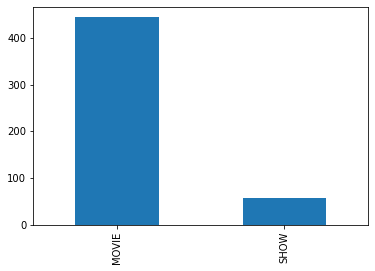

In [10]:
df["type"].value_counts().plot(kind="bar")

no. of movies released each year

In [11]:
df["release_year"].value_counts()

2000    25
1999    24
1998    21
1997    17
1995    14
        ..
1982     1
1958     1
1970     1
1928     1
1943     1
Name: release_year, Length: 79, dtype: int64

plot no. of movies released each year

<AxesSubplot:>

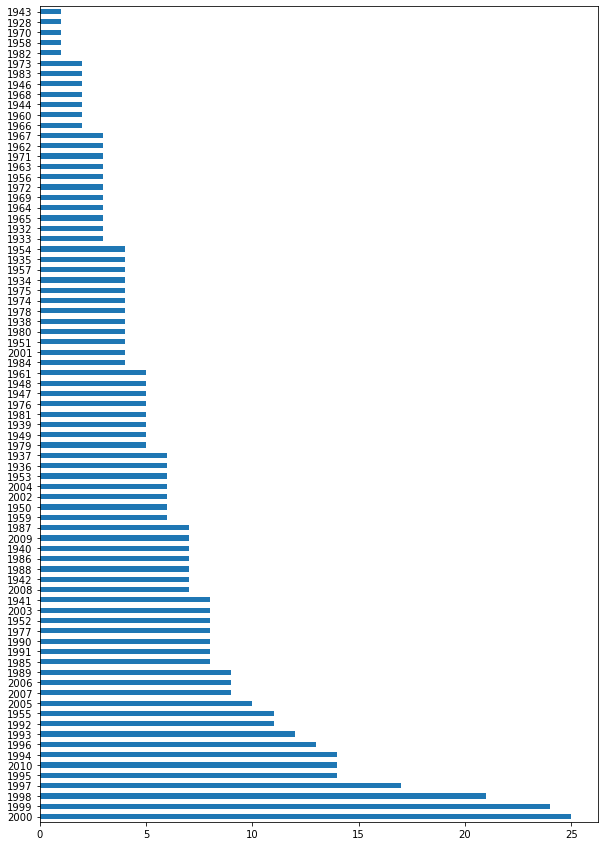

In [21]:
plt.figure(figsize=(10,15))
df["release_year"].value_counts().plot(kind="barh")

highest tmdb_score

In [30]:
df[df["tmdb_score"]==df["tmdb_score"].max()]

,id,title,type,description,release_year,runtime,genres,production_countries,tmdb_popularity,tmdb_score
351,ts25438,Out of the Box,SHOW,Out of the Box is a Disney Channel TV series t...,1998,24,"['music', 'comedy', 'family', 'fantasy', 'spor...",['US'],2.063,10.0


lowest tmdb_score

In [31]:
df[df["tmdb_score"]==df["tmdb_score"].min()]

,id,title,type,description,release_year,runtime,genres,production_countries,tmdb_popularity,tmdb_score
334,tm104563,Kazaam,MOVIE,"When Max fools a gang of local toughs, he find...",1996,93,"['fantasy', 'comedy', 'family']",['US'],7.175,4.2


average tmdb_score

In [32]:
df["tmdb_score"].mean()

6.644869215291754

find movies or tv shows whose runtime is greater than 2 hours

In [35]:
df[df["runtime"]>120]

,id,title,type,description,release_year,runtime,genres,production_countries,tmdb_popularity,tmdb_score
84,tm88215,The Sound of Music,MOVIE,"In the years before the Second World War, a to...",1965,175,"['romance', 'drama', 'family']",['US'],17.542,7.7
85,tm1,Star Wars,MOVIE,Princess Leia is captured and held hostage by ...,1977,125,"['scifi', 'action', 'fantasy']",['US'],77.321,8.2
87,tm189724,Mary Poppins,MOVIE,A magical nanny employs music and adventure to...,1964,139,"['comedy', 'fantasy', 'family']",['US'],35.811,7.6
89,tm114017,Oklahoma!,MOVIE,This joyous celebration of frontier life combi...,1955,148,"['romance', 'western', 'music', 'comedy', 'dra...",['US'],8.837,6.7
90,tm81911,"Hello, Dolly!",MOVIE,Dolly Levi is a strong-willed matchmaker who t...,1969,146,"['romance', 'comedy']",['US'],6.064,7.0
91,tm562,"20,000 Leagues Under the Sea",MOVIE,A ship sent to investigate a wave of mysteriou...,1954,127,"['scifi', 'drama', 'family', 'fantasy']",['US'],12.795,7.1
93,tm2,The Empire Strikes Back,MOVIE,"The epic saga continues as Luke Skywalker, in ...",1980,124,"['scifi', 'action', 'fantasy']",['US'],27.802,8.4
96,tm58193,Swiss Family Robinson,MOVIE,"After being shipwrecked, the Robinson family i...",1960,126,"['family', 'action']",['US'],10.119,6.9
98,tm42943,The Parent Trap,MOVIE,"Two identical twin sisters, separated at birth...",1961,129,"['comedy', 'romance', 'family']",['US'],10.537,7.1
105,tm37937,Journey to the Center of the Earth,MOVIE,An Edinburgh professor and assorted colleagues...,1959,132,"['fantasy', 'family', 'romance', 'scifi']",['US'],15.312,7.0


find average tmdb_score of movies or tv shows whose runtime is greater than 2 hours

In [40]:
df[df["runtime"]>120]["tmdb_score"].mean()

7.070270270270273

find data for movies which was released after year 2000

In [44]:
df[df["release_year"]>2000]

,id,title,type,description,release_year,runtime,genres,production_countries,tmdb_popularity,tmdb_score
420,tm133512,Pirates of the Caribbean: The Curse of the Bla...,MOVIE,"Jack Sparrow, a freewheeling 18th-century pira...",2003,143,"['fantasy', 'action']",['US'],484.892,7.8
421,tm135853,Avatar,MOVIE,"In the 22nd century, a paraplegic Marine is di...",2009,165,"['fantasy', 'scifi', 'action']","['US', 'GB']",598.284,7.5
422,tm90391,National Treasure,MOVIE,"Modern treasure hunters, led by archaeologist ...",2004,131,"['thriller', 'action', 'western', 'family']",['US'],26.045,6.6
423,tm151348,Fantastic Mr. Fox,MOVIE,The Fantastic Mr. Fox bored with his current l...,2009,87,"['animation', 'family', 'comedy', 'crime', 'dr...",['US'],21.157,7.8
424,tm22112,Night at the Museum,MOVIE,Chaos reigns at the natural history museum whe...,2006,108,"['comedy', 'fantasy', 'family']","['GB', 'US']",33.216,6.6
...,...,...,...,...,...,...,...,...,...,...
495,tm26315,Ice Age: The Meltdown,MOVIE,"Diego, Manny and Sid return in this sequel to ...",2006,91,"['comedy', 'animation', 'family', 'fantasy']",['US'],83.050,6.7
496,ts3533,The Avengers: Earth's Mightiest Heroes,SHOW,When the powers of a single hero are not enoug...,2010,24,"['scifi', 'animation', 'action', 'family']",['US'],39.251,8.3
497,tm76049,Around the World in 80 Days,MOVIE,"A bet pits a British inventor, a Chinese thief...",2004,120,"['comedy', 'family', 'western', 'action']","['GB', 'US', 'DE', 'IE']",17.765,5.9
498,tm137650,The Haunted Mansion,MOVIE,Workaholic Jim Evers and his wife/business par...,2003,88,"['comedy', 'thriller', 'fantasy', 'horror', 'f...",['US'],14.801,5.6
